<a href="https://colab.research.google.com/github/dharmendra-chouhan/s2datascience/blob/master/Age_Group_wise_Registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Age Group wise Registration

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1G9LdZeCed2psskC9MLuORz3tA9mkN_-M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ExtractedConstructionWorkerPatient.csv')  

#3. Read file as panda dataframe
import pandas as pd
df1 = pd.read_csv('ExtractedConstructionWorkerPatient.csv') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                 agegroup agecount
0  Age between 100 to 930       18
1    Age between 75 to 99       23
2    Age between 60 to 74      500
3    Age between 50 to 59     7643
4    Age between 25 to 49    49226
5    Age between 18 to 24     6438
6     Age between 1 to 17        1
7                   Age 0      108


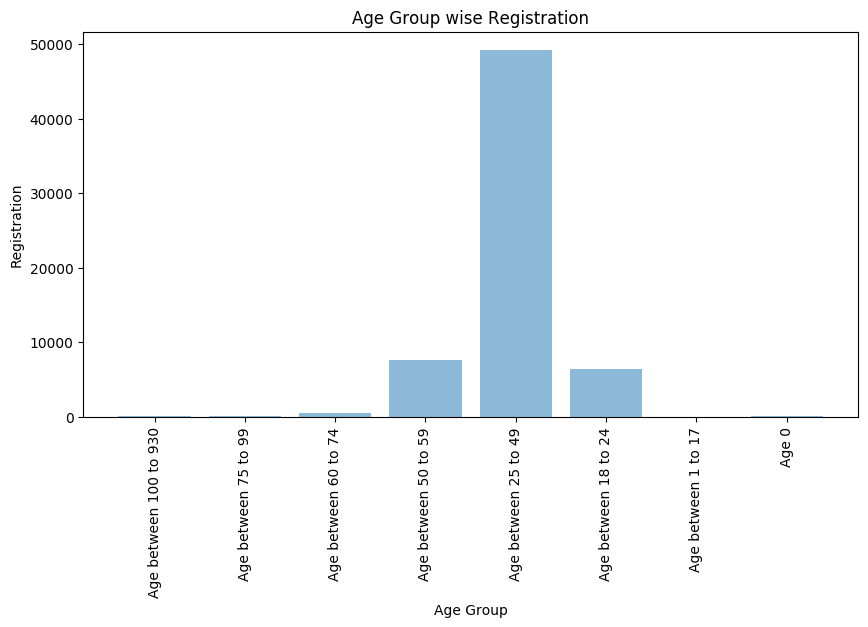

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
agewisereg=distwise_reg.sort_values(by=['regdid'])
agegroup_df = pd.DataFrame(columns=['agegroup', 'agecount'])
agewisereg=agewisereg.sort_values(by=['age'])
nmaxagemore100 =0
nmaxagemore75to100 =0
nmaxagemore50to60 =0
nmaxagemore60to75 =0
nmaxagemore25to50 =0
nmaxagemore18to25 =0
nmaxagemore1to18 =0
nmaxage0 =0
for index1, row in agewisereg.iterrows():
  if index1>100:
    nmaxagemore100=nmaxagemore100+row['regdid']
  elif (index1>=75 and index1<=100):
    nmaxagemore75to100=nmaxagemore75to100+row['regdid']
  elif (index1>=50 and index1<60):
    nmaxagemore50to60=nmaxagemore50to60+row['regdid']
  elif (index1>=60 and index1<75):
    nmaxagemore60to75=nmaxagemore60to75+row['regdid']
  elif (index1>=25 and index1<50):
    nmaxagemore25to50=nmaxagemore25to50+row['regdid']
  elif (index1>=18 and index1<25):
    nmaxagemore18to25=nmaxagemore18to25+row['regdid']
  elif (index1>=1 and index1<18):
    nmaxagemore1to18=nmaxagemore1to18+row['regdid']
  elif (index1==0):
    nmaxage0=nmaxage0+row['regdid']
  else:
    nmaxage0=nmaxage0+row['regdid']
agegroup_df = agegroup_df.append({'agegroup': 'Age between 100 to 930', 'agecount':nmaxagemore100}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 75 to 99', 'agecount':nmaxagemore75to100}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 60 to 74', 'agecount':nmaxagemore60to75}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 50 to 59', 'agecount':nmaxagemore50to60}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 25 to 49', 'agecount':nmaxagemore25to50}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 18 to 24', 'agecount':nmaxagemore18to25}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 1 to 17', 'agecount':nmaxagemore1to18}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age 0', 'agecount':nmaxage0}, ignore_index=True)
print(agegroup_df)


plt.rcParams['figure.figsize'] =[10,5]
objects = agegroup_df['agegroup']
y_pos = np.arange(len(objects))
performance = agegroup_df['agecount']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Registration')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.title('Age Group wise Registration')
plt.show()

